In [7]:
import scipy.io
import numpy as np
from matplotlib import pyplot

from sklearn import (datasets, decomposition, ensemble, manifold, random_projection)

In [3]:
training_images = scipy.io.loadmat('L7/data/ReducedImagesForTraining.mat')["images"]
testing_images = scipy.io.loadmat('L7/data/ReducedImagesForTesting.mat')["images"]
faces_images = np.append(training_images, testing_images, axis=1).T
print(faces_images.shape)

(350, 4920)


In [4]:
faces_targets = np.array([i // 5 for i in range(250)] + [i // 2 for i in range(100)])

In [11]:
def plot_faces(faces_data, faces_target):
    for target in set(faces_targets):
        correct_target = (target == faces_target)
        pyplot.scatter(faces_data.T[0][correct_target], 
                       faces_data.T[1][correct_target], 
                       alpha=0.5)
    pyplot.show() 

(350, 2)


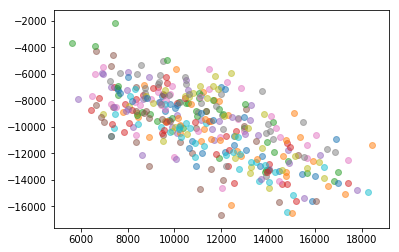

In [12]:
faces_projected = (random_projection
                   .SparseRandomProjection(n_components=2)
                   .fit_transform(faces_images))
print(faces_projected.shape)
plot_faces(faces_projected, faces_targets)

In [13]:
faces_pca = decomposition.PCA(n_components=2).fit_transform(faces_images)
faces_kpca_poly = decomposition.KernelPCA(n_components=2, kernel="poly",
                                           degree=3, coef0=5).fit_transform(faces_images)
faces_kpca_rbf = decomposition.KernelPCA(n_components=2, kernel="rbf",
                                          gamma=10).fit_transform(faces_images)
faces_kpca_sigmoid = decomposition.KernelPCA(n_components=2, kernel="sigmoid",
                                              gamma=.001).fit_transform(faces_images)
faces_kpca_cosine = decomposition.KernelPCA(n_components=2, 
                                             kernel="cosine").fit_transform(faces_images)
faces_iso_30 = manifold.Isomap(30, n_components=2).fit_transform(faces_images)
faces_iso_3 = manifold.Isomap(n_neighbors=3, n_components=2).fit_transform(faces_images)
faces_iso_2 = manifold.Isomap(n_neighbors=2, n_components=2).fit_transform(faces_images)
faces_lle_30 = manifold.LocallyLinearEmbedding(30, n_components=2).fit_transform(faces_images)
faces_lle_10 = manifold.LocallyLinearEmbedding(n_neighbors=10, 
                                                n_components=2).fit_transform(faces_images)
faces_lle_50_hessian = (manifold
                         .LocallyLinearEmbedding(n_neighbors=50, n_components=2, method="hessian")
                         .fit_transform(faces_images))
faces_lle_30_ltsa = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                                     method="ltsa").fit_transform(faces_images)
faces_mds = manifold.MDS(n_components=2, n_init=1, max_iter=100).fit_transform(faces_images)
faces_tsne_pca = manifold.TSNE(n_components=2, init='pca').fit_transform(faces_images)

/home/lukasz/anaconda3/lib/python3.6/site-packages/scipy/linalg/decomp_lu.py:71: RuntimeWarning: Diagonal number 140 is exactly zero. Singular matrix.
  RuntimeWarning)




 faces_pca


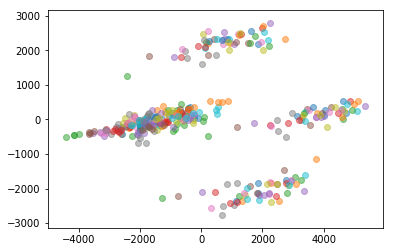



 faces_kpca_poly


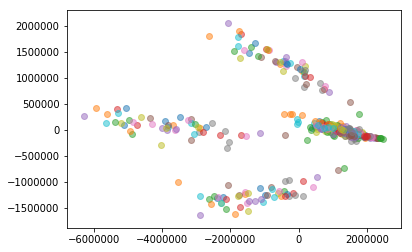



 faces_kpca_rbf


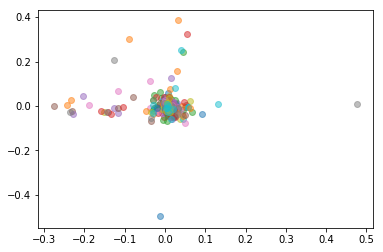



 faces_kpca_sigmoid


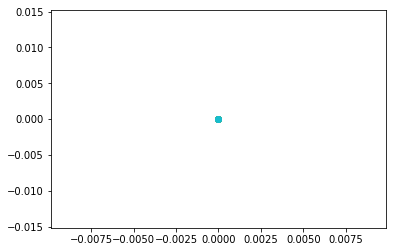



 faces_kpca_cosine


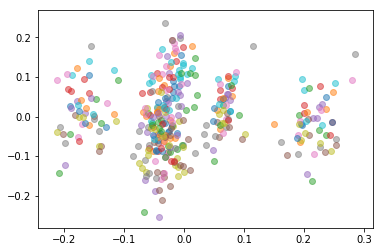



 faces_iso_30


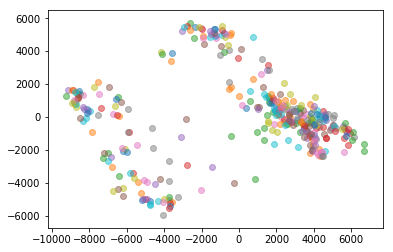



 faces_iso_3


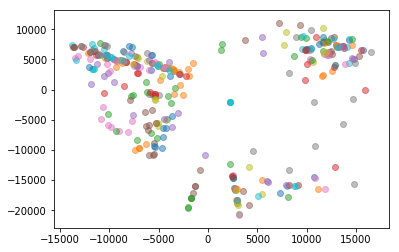



 faces_iso_2


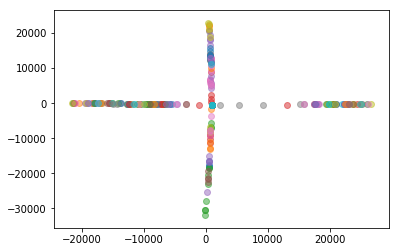



 faces_lle_30


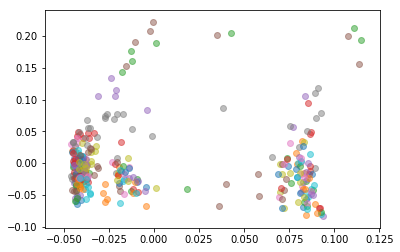



 faces_lle_10


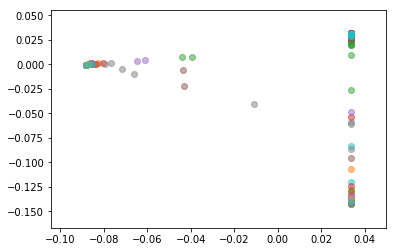



 faces_lle_50_hessian


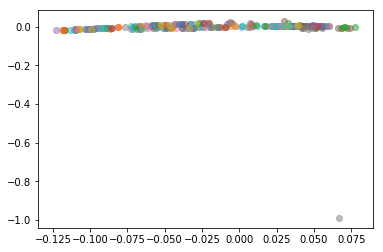



 faces_lle_30_ltsa


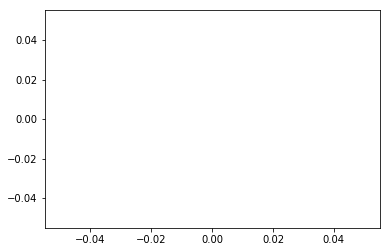



 faces_mds


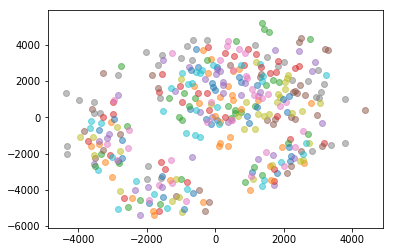



 faces_tsne_pca


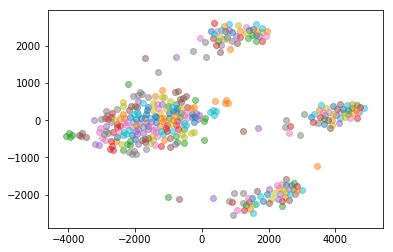

In [14]:
reduced_data = [
    faces_pca,
    faces_kpca_poly,
    faces_kpca_rbf,
    faces_kpca_sigmoid,
    faces_kpca_cosine,
    faces_iso_30,
    faces_iso_3,
    faces_iso_2,
    faces_lle_30,
    faces_lle_10,
    faces_lle_50_hessian,
    faces_lle_30_ltsa,
    faces_mds,
    faces_tsne_pca
]

reduced_data_names = [
    "faces_pca",
    "faces_kpca_poly",
    "faces_kpca_rbf",
    "faces_kpca_sigmoid",
    "faces_kpca_cosine",
    "faces_iso_30",
    "faces_iso_3",
    "faces_iso_2",
    "faces_lle_30",
    "faces_lle_10",
    "faces_lle_50_hessian",
    "faces_lle_30_ltsa",
    "faces_mds",
    "faces_tsne_pca"
]

for name, reduced in zip(reduced_data_names, reduced_data):
    print(2 * "\n", name)
    plot_faces(reduced, faces_targets)